In [ ]:
# ==========================
# 🔗 Mount Google Drive & Navigasi ke Folder Proyek
# ==========================
from google.colab import drive
import shutil
import time
import os  # Untuk navigasi dan pengelolaan path

# ==========================
# ⚙️ Konfigurasi Umum
# ==========================
import numpy as np
import pandas as pd
import random
import warnings
from collections import Counter, defaultdict  # Untuk menghitung frekuensi item dan menyimpan hasil hitungan per resolusi

# ==========================
# 🖼️ Image Loading & Manipulation
# ==========================
from PIL import Image  # Untuk membuka dan manipulasi gambar
from skimage import io, img_as_ubyte, util, exposure
from skimage.transform import resize, rotate, AffineTransform, warp
import cv2  # OpenCV untuk manipulasi gambar lanjutan

# ==========================
# 📊 Visualization
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Untuk progress bar saat proses looping banyak gambar

# ==========================
# 🤖 Deep Learning Framework: TensorFlow & Keras
# ==========================
import tensorflow as tf

# ==========================
# 🧮 Model Evaluation & Metrics
# ==========================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Konfigurasi warning & seed
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

seed = 0
np.random.seed(seed)
random.seed(seed)

# Set seed TensorFlow (diletakkan setelah import tf)
tf.random.set_seed(seed)

# ==========================
# 📦 Library Tambahan
# ==========================
import kagglehub

In [ ]:
%%time

drive.flush_and_unmount()

CPU times: user 20.9 ms, sys: 2.31 ms, total: 23.2 ms
Wall time: 3.41 s


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path tujuan proyek di Google Drive
target_path = '/content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label'

# Cek apakah path ada, lalu berpindah ke direktori tersebut
if os.path.exists(target_path):
    os.chdir(target_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}. Periksa kembali lokasi foldernya.")

Mounted at /content/drive
✅ Berhasil berpindah ke direktori: /content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label


In [ ]:
# ============================ #
#  IMAGE DISTRIBUTION ANALYSIS #
# ============================ #

def analyze_image_distribution(base_dir):
    """
    Menganalisis distribusi gambar berdasarkan kelas dan seluruh resolusi yang ditemukan.

    Args:
        base_dir (str): Direktori utama yang berisi subfolder per kelas.

    Returns:
        tuple:
            - Dictionary jumlah gambar per kelas utama.
            - Dictionary jumlah gambar per sub-kelas.
            - Dictionary jumlah gambar berdasarkan resolusi.
    """
    main_class_count = {}
    sub_class_count = {}
    res_counts = {}
    valid_ext = (".jpg", ".jpeg", ".png")

    # Kumpulkan semua path gambar terlebih dahulu
    all_image_paths = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.lower().endswith(valid_ext):
                img_path = os.path.join(root, file)
                all_image_paths.append(img_path)

    # Identifikasi resolusi seluruh gambar
    for img_path in tqdm(all_image_paths, desc="🔍 Menganalisis gambar"):
        parts = os.path.normpath(img_path).split(os.sep)
        if len(parts) < 3:
            continue  # skip yang tidak sesuai struktur

        main_class = parts[-3]
        sub_class = parts[-2]

        main_class_count[main_class] = main_class_count.get(main_class, 0) + 1
        sub_class_count[sub_class] = sub_class_count.get(sub_class, 0) + 1

        try:
            with Image.open(img_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"
                res_counts[resolution] = res_counts.get(resolution, 0) + 1
        except Exception as e:
            print(f"❌ Error: {img_path} ({e})")

    return main_class_count, sub_class_count, res_counts

In [ ]:
%%time

dataset_path = "/content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label/dataset_final"

# Analisis distribusi gambar
main_class_summary, sub_class_summary, resolution_summary = analyze_image_distribution(dataset_path)

# Menampilkan hasil
print("\n📂 Jumlah gambar per kelas utama:")
for cls, total in main_class_summary.items():
    print(f"- {cls}: {total}")

print("\n📂 Jumlah gambar per sub-kelas:")
for cls, total in sub_class_summary.items():
    print(f"- {cls}: {total}")

print("\n🖼️ Jumlah gambar berdasarkan resolusi:")
for res, count in sorted(resolution_summary.items(), key=lambda x: x[1], reverse=True):
    print(f"- {res}: {count}")

🔍 Menganalisis gambar: 100%|██████████| 1166/1166 [05:49<00:00,  3.33it/s]


📂 Jumlah gambar per kelas utama:
- dataset_final: 1166

📂 Jumlah gambar per sub-kelas:
- B3: 244
- Organik: 414
- Anorganik: 508

🖼️ Jumlah gambar berdasarkan resolusi:
- 1300x956: 36
- 612x408: 30
- 390x280: 28
- 480x270: 16
- 600x400: 14
- 800x533: 13
- 800x534: 13
- 1600x1157: 12
- 1200x675: 11
- 1024x768: 11
- 800x600: 9
- 1000x667: 9
- 1500x1101: 8
- 275x183: 8
- 626x417: 8
- 612x459: 8
- 1024x683: 7
- 1280x720: 6
- 1300x866: 6
- 1600x900: 6
- 866x1390: 6
- 1300x957: 6
- 500x375: 5
- 1280x853: 5
- 1200x900: 5
- 1200x1200: 5
- 1024x682: 5
- 500x500: 5
- 1200x800: 5
- 900x600: 5
- 1000x600: 5
- 2048x1536: 5
- 360x360: 5
- 408x612: 5
- 560x400: 5
- 600x600: 5
- 643x360: 5
- 1600x1290: 4
- 259x194: 4
- 800x450: 4
- 1300x953: 4
- 1300x955: 4
- 225x225: 4
- 1000x750: 4
- 1600x1200: 4
- 626x351: 4
- 768x432: 4
- 640x640: 4
- 600x420: 4
- 640x480: 3
- 1300x960: 3
- 300x225: 3
- 1600x1067: 3
- 900x450: 3
- 1500x1225: 3
- 400x300: 3
- 867x1390: 3
- 1920x1080: 3
- 459x612: 3
- 800x500: 3
- 

In [ ]:
def show_multiple_images_from_folder(folder_path, title, num_images=10):
    """
    Menampilkan beberapa gambar dari satu folder (tanpa subfolder per kelas).
    """
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    cols = 5
    rows = (len(selected_images) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(2.5 * cols, 2.5 * rows))
    fig.suptitle(title, fontsize=16)

    for i in range(rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        if i < len(selected_images):
            img = Image.open(os.path.join(folder_path, selected_images[i]))
            ax.imshow(img)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

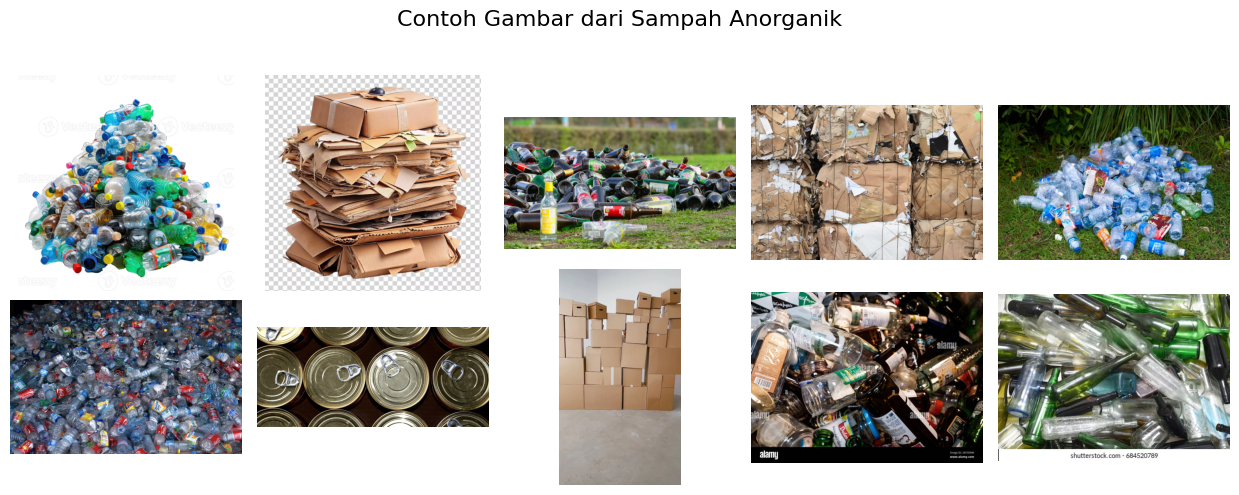

CPU times: user 939 ms, sys: 20.7 ms, total: 960 ms
Wall time: 1.32 s


In [ ]:
%%time

# Path ke dataset
base_path = "/content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label/dataset_final/Anorganik"
title = "Contoh Gambar dari Sampah Anorganik"
show_multiple_images_from_folder(base_path, title, num_images=10)

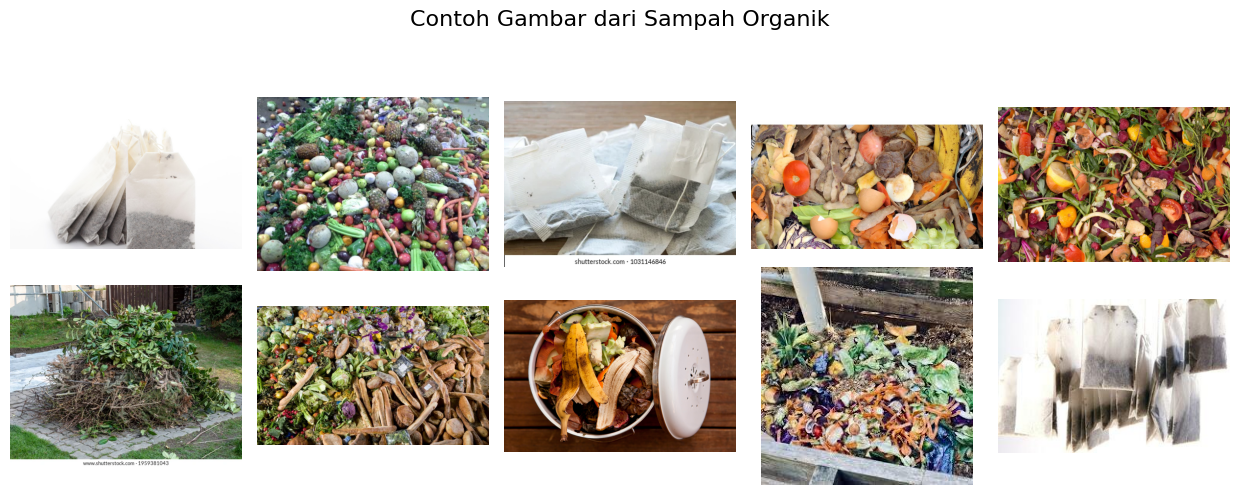

CPU times: user 1.07 s, sys: 85.3 ms, total: 1.16 s
Wall time: 2.47 s


In [ ]:
%%time

# Path ke dataset
base_path = "/content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label/dataset_final/Organik"
title = "Contoh Gambar dari Sampah Organik"
show_multiple_images_from_folder(base_path, title, num_images=10)

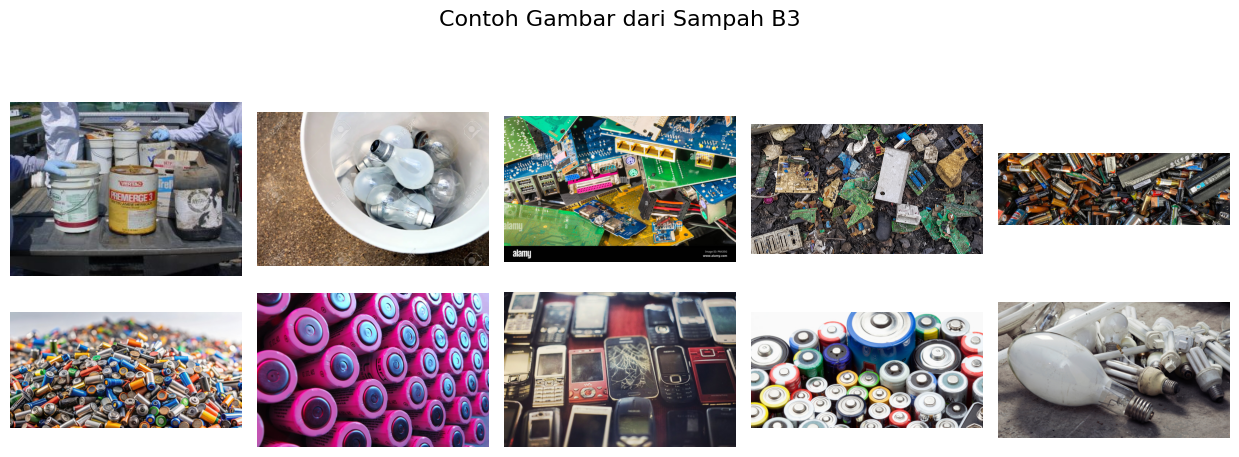

CPU times: user 1.64 s, sys: 287 ms, total: 1.93 s
Wall time: 2.07 s


In [ ]:
%%time

# Path ke dataset
base_path = "/content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label/dataset_final/B3"
title = "Contoh Gambar dari Sampah B3"
show_multiple_images_from_folder(base_path, title, num_images=10)

In [ ]:
%%time

# Path ke dataset
base_path = '/content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label/dataset_final'

# Mengumpulkan path file, label, dan nama file
file_names = []
labels = []
full_paths = []

for path, subdirs, files in os.walk(base_path):
    for name in files:
        if name.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(path, name)
            full_paths.append(full_path)
            file_names.append(name)

            # Ambil nama folder tempat file berada sebagai label (kelas)
            label = os.path.basename(os.path.dirname(full_path))  # Sama dengan parts[-2]
            labels.append(label)

# Membuat DataFrame dari informasi file
df = pd.DataFrame({
    "path": full_paths,
    "file_name": file_names,
    "labels": labels
})

# Tampilkan jumlah data per kelas
print("Jumlah data per label:\n")
print(df.groupby('labels').size(), "\n")

Jumlah data per label:

labels
Anorganik    508
B3           244
Organik      414
dtype: int64 

CPU times: user 13.1 ms, sys: 1.17 ms, total: 14.2 ms
Wall time: 43.4 ms


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split 80% train, 20% test berdasarkan sub-kelas
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Pastikan stratifikasi berdasarkan sub-kelas ('labels')
for train_idx, test_idx in splitter.split(df, df['labels']):
    df_train = df.iloc[train_idx].reset_index(drop=True)
    df_test = df.iloc[test_idx].reset_index(drop=True)

print("🔹 Jumlah data training per sub-kelas:\n", df_train['labels'].value_counts(), "\n")
print("🔹 Jumlah data test per sub-kelas:\n", df_test['labels'].value_counts())

🔹 Jumlah data training per sub-kelas:
 labels
Anorganik    406
Organik      331
B3           195
Name: count, dtype: int64 

🔹 Jumlah data test per sub-kelas:
 labels
Anorganik    102
Organik       83
B3            49
Name: count, dtype: int64


In [ ]:
def copy_files(df_subset, split_name, base_output):
    """
    Menyalin file gambar ke dalam struktur direktori berdasarkan subset (train/test)
    dan label bertingkat (misalnya 'Recyclable/Plastic').

    Args:
        df_subset (pd.DataFrame): Subset data (train/test) dengan kolom 'path', 'file_name', dan 'labels'.
        split_name (str): Nama subset ('train' atau 'test').
        base_output (str): Direktori output utama (default: 'dataset_final').
    """
    for _, row in tqdm(df_subset.iterrows(), total=len(df_subset), desc=f"📁 Menyalin data ke '{split_name}'"):
        label_path = row['labels']
        dst_dir = os.path.join(base_output, split_name, label_path)
        os.makedirs(dst_dir, exist_ok=True)

        src_path = row['path']
        dst_path = os.path.join(dst_dir, row['file_name'])

        # Salin file jika belum ada
        if not os.path.exists(dst_path):
            shutil.copy2(src_path, dst_path)

In [ ]:
%%time

# Tentukan path output baru
output_folder = "/content/drive/MyDrive/Capstone_Project/Klasifikasi_Gambar_Sampah_3_Label/dataset_split"

# Salin file ke folder output baru
copy_files(df_train, split_name="train", base_output=output_folder)
copy_files(df_test, split_name="test", base_output=output_folder)

📁 Menyalin data ke 'test': 100%|██████████| 234/234 [00:06<00:00, 35.47it/s]

CPU times: user 1.46 s, sys: 2.64 s, total: 4.11 s
Wall time: 29.7 s
